# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import re
import csv
from collections import defaultdict
import pandas as pd

def preprocess_text(text): #tokenizing text
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    return tokens

def get_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngram = ' '.join(tokens[i:i+n])
        ngrams.append(ngram)
    return ngrams

def count_ngrams(texts, n): #frequency of n-grams
    ngram_counts = defaultdict(int)
    for text in texts:
        tokens = preprocess_text(text)
        ngrams = get_ngrams(tokens, n)
        for ngram in ngrams:
            ngram_counts[ngram] += 1
    return dict(ngram_counts)

def calculate_bigram_probabilities(texts):
    bigram_counts = defaultdict(int)
    word_counts = defaultdict(int)

    for text in texts:
        tokens = preprocess_text(text) #counting individual word
        for token in tokens:
            word_counts[token] += 1
        # bigrams
        bigrams = get_ngrams(tokens, 2)
        for bigram in bigrams:
            bigram_counts[bigram] += 1

    bigram_probs = {}
    for bigram, count in bigram_counts.items():
        word1 = bigram.split()[0]
        bigram_probs[bigram] = count / word_counts[word1]

    return bigram_probs

def extract_noun_phrases(text):
    tokens = preprocess_text(text)
    noun_phrases = []
    current_phrase = []
    adjectives = {'good', 'great', 'bad', 'nice', 'excellent', 'poor', 'amazing'}
    nouns = {'product', 'quality', 'service', 'item', 'price', 'customer', 'review'}

    for i, token in enumerate(tokens):
        if token in adjectives or token in nouns:
            current_phrase.append(token)
        else:
            if current_phrase:
                noun_phrases.append(' '.join(current_phrase))
                current_phrase = []

    if current_phrase:
        noun_phrases.append(' '.join(current_phrase))

    return noun_phrases

def calculate_relative_probabilities(texts):
    noun_phrase_counts = defaultdict(lambda: defaultdict(int)) #extractting frequencies of noun
    all_noun_phrases = set()

    for i, text in enumerate(texts):
        noun_phrases = extract_noun_phrases(text)
        for np in noun_phrases:
            noun_phrase_counts[i][np] += 1
            all_noun_phrases.add(np)

    max_frequencies = {}
    for np in all_noun_phrases:
        max_freq = max(noun_phrase_counts[i][np] for i in range(len(texts)))
        max_frequencies[np] = max_freq if max_freq > 0 else 1

    relative_probs = []
    for i in range(len(texts)):
        row = {}
        for np in all_noun_phrases:
            row[np] = noun_phrase_counts[i][np] / max_frequencies[np]
        relative_probs.append(row)

    return pd.DataFrame(relative_probs)

def main():
    texts = []
    with open('product_reviews.csv', 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            texts.append(row[0])
    trigram_counts = count_ngrams(texts, 3)
    print("\n=== Trigram Frequencies ===")
    for trigram, count in sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{trigram}: {count}")

    bigram_probs = calculate_bigram_probabilities(texts)
    print("\n=== Bigram Probabilities ===")
    for bigram, prob in sorted(bigram_probs.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{bigram}: {prob:.3f}")
    relative_probs_df = calculate_relative_probabilities(texts)
    print("\n=== Relative Probabilities of Noun Phrases ===")
    print(relative_probs_df.head())

if __name__ == "__main__":
    main()


=== Trigram Frequencies ===
the fire tv: 95
this is a: 87
a lot of: 69
the kindle fire: 58
is a great: 55
if you are: 54
this is the: 54
kindle fire hd: 50
be able to: 50
you have to: 43

=== Bigram Probabilities ===
fpresizeplayerspacensprefixwh try: 1.000
parentdocumentgetelementbyidnsprefix movieframeid: 1.000
movieframeid if: 1.000
ifrmstyleheight h: 1.000
catcherr if: 1.000
documentgetelementbyidnsprefix clipdivstyleheighthpx: 1.000
clipdivstyleheighthpx documentgetel: 1.000
androidsbr br: 1.000
outbr br: 1.000
timebr br: 1.000

=== Relative Probabilities of Noun Phrases ===
   poor quality  excellent  great price  service  amazing  nice price  \
0           0.0        0.0          0.0      0.0      0.0         0.0   
1           0.0        0.0          0.0      0.0      0.0         0.0   
2           0.0        0.0          0.0      0.0      0.0         0.0   
3           0.0        0.0          0.0      0.0      0.0         0.0   
4           0.0        0.0          0.0      0.

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import pandas as pd
import math
from collections import Counter, defaultdict
import re

class TFIDFSearchEngine:
    def __init__(self):
        self.documents = []
        self.vocab = set()
        self.doc_term_matrix = []
        self.idf_scores = {}
        self.tfidf_matrix = []

    def preprocess_text(self, text):
        text = text.lower()  # lowercase function
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        words = [word for word in text.split() if word]
        return words

    def compute_tf(self, text):  #term frequencies
        words = self.preprocess_text(text)
        word_count = Counter(words)
        total_words = len(words)
        return {word: count / total_words for word, count in word_count.items()}

    def compute_idf(self):
        num_docs = len(self.documents)
        term_doc_count = defaultdict(int)
        for doc in self.documents:
            words = set(self.preprocess_text(doc))
            for word in words:
                term_doc_count[word] += 1
        self.idf_scores = {term: math.log(num_docs / (count + 1)) + 1 for term, count in term_doc_count.items()}
        return self.idf_scores

    def build_tfidf_matrix(self, texts):
        self.documents = texts
        self.doc_term_matrix = []
        for doc in self.documents:
            words = self.preprocess_text(doc)
            self.vocab.update(words)
        self.compute_idf()

        for doc in self.documents:
            tf_scores = self.compute_tf(doc)
            tfidf_scores = {}
            for term in self.vocab:
                tf = tf_scores.get(term, 0)
                idf = self.idf_scores.get(term, 0)
                tfidf_scores[term] = tf * idf
            self.tfidf_matrix.append(tfidf_scores)

        return self.tfidf_matrix

    def compute_query_tfidf(self, query):
        query_tf = self.compute_tf(query)
        query_tfidf = {}

        for term in self.vocab:
            tf = query_tf.get(term, 0)
            idf = self.idf_scores.get(term, 0)
            query_tfidf[term] = tf * idf

        return query_tfidf

    def cosine_similarity(self, vec1, vec2):
        dot_product = sum(vec1.get(term, 0) * vec2.get(term, 0) for term in self.vocab)
        mag1 = math.sqrt(sum(val**2 for val in vec1.values()))
        mag2 = math.sqrt(sum(val**2 for val in vec2.values()))
        if mag1 == 0 or mag2 == 0:
            return 0
        return dot_product / (mag1 * mag2)

    def rank_documents(self, query):
        query_tfidf = self.compute_query_tfidf(query)

        #similarities
        similarities = []
        for idx, doc_tfidf in enumerate(self.tfidf_matrix):
            sim = self.cosine_similarity(query_tfidf, doc_tfidf)
            similarities.append((idx, sim))

        return sorted(similarities, key=lambda x: x[1], reverse=True)


def main():
    df = pd.read_csv('product_reviews.csv', header=None) #no header in datset
    texts = df[0].tolist()
    search_engine = TFIDFSearchEngine()
    print("Building TF-IDF matrix...")
    tfidf_matrix = search_engine.build_tfidf_matrix(texts)

    query = "best product with amazing features"
    print("\nProcessing query:", query)

    ranked_docs = search_engine.rank_documents(query)

    print("\nTop 10 similar documents:")
    print("Rank\tScore\tDocument Preview")
    print("-" * 60)
    for rank, (doc_idx, score) in enumerate(ranked_docs[:10], 1):
        preview = texts[doc_idx][:50] + "..."
        print(f"{rank}\t{score:.4f}\t{preview}")

    results_df = pd.DataFrame(ranked_docs, columns=['Document_Index', 'Similarity_Score'])
    results_df['Document_Text'] = results_df['Document_Index'].apply(lambda x: texts[x])
    results_df.to_csv('search_results.csv', index=False)

    print("\nDetailed results saved to 'search_results.csv'")
    print("\nTF-IDF Statistics:")
    print(f"No of documents: {len(texts)}")
    print(f"Vocabulary size: {len(search_engine.vocab)}")

    print("\nExample TF-IDF weights for first document:")
    sorted_terms = sorted(tfidf_matrix[0].items(), key=lambda x: x[1], reverse=True)[:10]
    for term, weight in sorted_terms:
        print(f"{term}: {weight:.4f}")


if __name__ == "__main__":
    main()


Building TF-IDF matrix...

Processing query: best product with amazing features

Top 10 similar documents:
Rank	Score	Document Preview
------------------------------------------------------------
1	0.3269	Good product works amazing . Works awesome from ho...
2	0.2959	Amazing Sound! All around great product! Nothing n...
3	0.2863	Great product with a ton of features. Add the Echo...
4	0.2696	Best kindle so far....
5	0.2636	The product it amazing love that it turns in light...
6	0.2389	Overall I was a little skeptical because this wasn...
7	0.2273	Amazing the best Amazon purchases EVER If you don'...
8	0.2187	The tap is amazing. portable and connected to all ...
9	0.2097	It's amazing! I love how loud it plays the music!!...
10	0.1984	We bought this product to compliment our other ama...

Detailed results saved to 'search_results.csv'

TF-IDF Statistics:
No of documents: 1000
Vocabulary size: 7305

Example TF-IDF weights for first document:
h: 1.4429
ifrm: 0.7215
var: 0.7215
clipdivstyleh

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

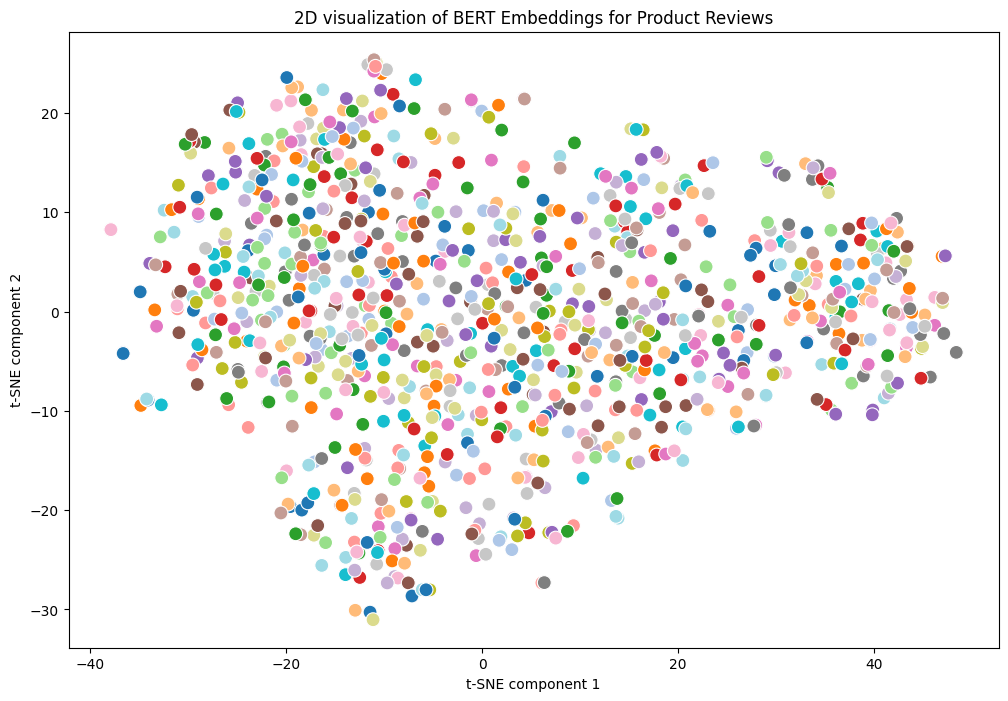

In [ ]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel
import torch

df = pd.read_csv('product_reviews.csv', header=None) #no header
reviews = df[0].tolist()

#BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(reviews):
    embeddings = []
    with torch.no_grad():
        for review in reviews:
            inputs = tokenizer(review, return_tensors='pt', truncation=True, padding=True, max_length=512)
            outputs = model(**inputs)
            cls_embedding = outputs.last_hidden_state[:, 0, :].numpy()
            embeddings.append(cls_embedding.flatten()) #flattening and appending
    return embeddings

document_embeddings = get_bert_embeddings(reviews)
document_embeddings_array = np.vstack(document_embeddings)
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(document_embeddings_array)
#df for pltting
df_tsne = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df_tsne['review'] = reviews
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x", y="y", data=df_tsne, hue="review", palette="tab20", legend=None, s=100)
plt.title("2D visualization of BERT Embeddings for Product Reviews")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
One challenge i faced is understanding BERT model and architecture i enjoyed practical implementation of BERT
because it gave me deeper understanding of NLP and time allocated is fair.
